In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

sns.set()

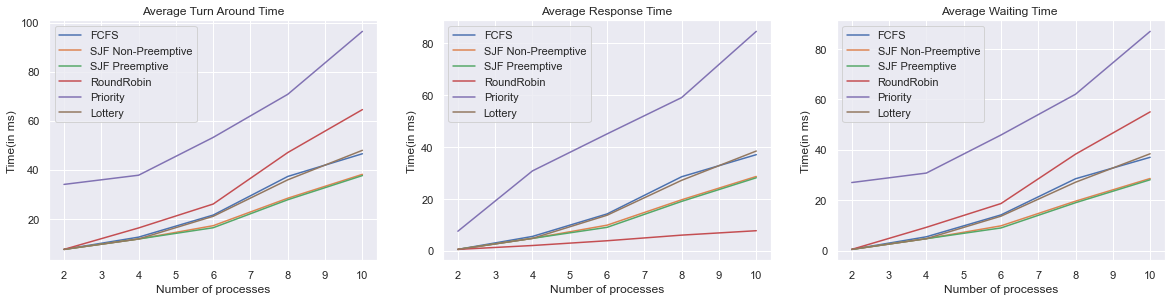

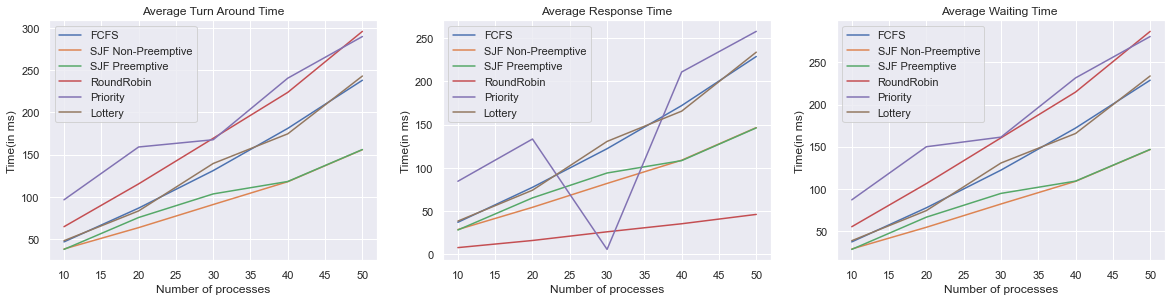

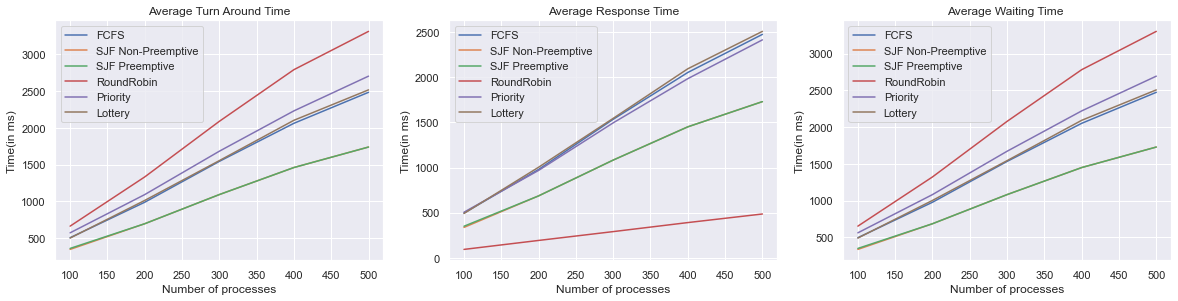

In [2]:
iters=[[2,4,6,8,10],[10,20,30,40,50],[100,200,300,400,500]]
count=0
for n_vals in iters:

    algos = ['FCFS', 'SJF Non-Preemptive', 'SJF Preemptive', 'RoundRobin', 'Priority',"Lottery"]

    ATT = {}
    ART = {}
    AWT = {}

    for n in n_vals:

        n_ATT = {x: 0 for x in algos}
        n_ART = {x: 0 for x in algos}
        n_AWT = {x: 0 for x in algos}

        os.system(f'simp2 {n} > temp.txt')

        algo_scores = []
        with open('temp.txt') as f:
            for line in f:
                x = line.replace('\n', '')

                if x != '':
                    algo_scores.append(x)
        # print(algo_scores)
        algo_scores = algo_scores[4::5]
        # print(algo_scores)

        for i, scores in enumerate(algo_scores):
            sc = [float(x) for x in scores.split()]
            n_ATT[algos[i]]=sc[0]
            n_ART[algos[i]]=sc[1]
            n_AWT[algos[i]]=sc[2]

        ATT[n] = n_ATT
        ART[n] = n_ART
        AWT[n] = n_AWT

    # print(ATT)
    # print(ART)
    # print(AWT)

    l={"Average Turn Around Time":ATT,"Average Response Time":ART, "Average Waiting Time " : AWT}

    plt.figure(figsize=(20,15))

    for j,i in l.items():
        count+=1
        algo1=[]
        algo2=[]
        algo3=[]
        algo4=[]
        algo5=[]
        algo6=[]
        for k, val in i.items():
            # print(k,val)
            for key,value in val.items():
                # print(key,value)
                if key=="FCFS":
                    algo1.append(value)
                if key=="SJF Non-Preemptive":
                    algo2.append(value)
                if key=="SJF Preemptive":
                    algo3.append(value)
                if key=="RoundRobin":
                    algo4.append(value)
                if key=="Priority":
                    algo5.append(value)
                if key=="Lottery":
                    algo6.append(value)
        
        plt.subplot(3,3,count)
        plt.plot(n_vals,algo1,label="FCFS")
        plt.plot(n_vals,algo2,label="SJF Non-Preemptive")
        plt.plot(n_vals,algo3,label="SJF Preemptive")
        plt.plot(n_vals,algo4,label="RoundRobin")
        plt.plot(n_vals,algo5,label="Priority")
        plt.plot(n_vals,algo6,label="Lottery")

        plt.legend()
        plt.title(j)
        plt.xlabel("Number of processes")
        plt.ylabel("Time(in ms)")